#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

##**Members**:
- **Md. Fahim Islam -> 2131059642**
- **Amit Chakraborty-> 2132692642**
- **Aditto Rahman   -> 2122332042**
- **Nahid Hassan    -> 2031269642**


- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***

# Imports

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import Normalizer

## Data Import

In [ ]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [ ]:
# Missing values
df.isnull().sum()

#Droping Features



In [ ]:
df['EcNumber'].value_counts()


##EcNumber Correlation check

In [ ]:
df_sub = df[['EcNumber', 'InjuryType']].copy()
df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcNumber and InjuryType')
plt.tight_layout()
plt.show()


KeyError: "['EcNumber'] not in index"

The value 0.00095 represents the correlation between EcNumber and InjuryType. A correlation of 0.00095 is extremely close to zero, meaning that there is no significant linear relationship between these two variables. That's why we deleted the EcNumber name region.

##HospitalName Correlation check

In [ ]:
df['HospitalName'].value_counts()

In [ ]:
df_sub = df[['HospitalName', 'InjuryType']].copy()
df_sub['HospitalName'] = df_sub['HospitalName'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between HospitalName and InjuryType')
plt.tight_layout()
plt.show()

The correlation between HospitalName and InjuryType is 0.12, which is a very weak positive correlation. This indicates that the two variables have a very minimal linear relationship, meaning the hospital where a patient was treated has little influence on the type of injury in the data.So we will remove this column

##CallTime Correlation check

In [ ]:
df['CallTime'].value_counts()

KeyError: 'CallTime'

In [ ]:
df_sub = df[['CallTime', 'InjuryType']].copy()

df_sub['CallTime'] = df_sub['CallTime'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0042 shows a very weak negative correlation between "CallTime" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "CallTime" column.

##EcYear Correlation check

In [ ]:
df['EcYear'].value_counts()

In [ ]:
df_sub = df[['EcYear', 'InjuryType']].copy()

df_sub['EcYear'] = df_sub['EcYear'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0076 shows a very weak negative correlation between "EcYear" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "EcYear" column.

##Info About Dropping

` EcNumber, HospitalName, EcYear, PatientStatus and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



In [ ]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear', 'CallTime'], axis=1)

In [ ]:
df['PatientStatus'].value_counts()


In [ ]:
df.info()

#Filling the Missing Values


In [ ]:
#missing values
df.isnull().sum()

##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [ ]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender' ,'PatientStatus'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

#Duplicate Value

In [ ]:
df[df.duplicated()]

In [ ]:
df.duplicated().sum()

##Handle Duplicate value

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
df.shape

In [ ]:
df.info()

#Encoding the categorical columns

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause


Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [ ]:
df['EducationTitle'].value_counts()

In [ ]:
# Delete the whole row where EducationTitle is 0
df = df[df['EducationTitle'] != '0']
df['EducationTitle'].value_counts()

###Info EducationTitle Encoding

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EducationTitle Visualization Bar chart




In [ ]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [ ]:

encoder=OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

In [ ]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

The histogram shows the distribution of EducationTitle in a dataset. It reveals that most people have education title 5, with fewer people having higher titles and even fewer having lower titles. There are also a few outliers with very high education titles.








\

###EducationTitle Visualization Box plot

In [ ]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

The median education title is 5, indicating that 50% of the individuals have an education title less than or equal to 5.

The box plot shows a slight right skew, as the whisker on the right side is longer than the whisker on the left side. This indicates that there are a few individuals with higher education titles, but the majority of individuals have lower education titles.


In [ ]:
df['InjuryType'].value_counts()

###Info InjuryType Encoding

```
We are using ordinal encoding for "InjuryType" because this method assigns numerical values to categories based on a meaningful order.
 In the case of injury severity, there is a natural hierarchy from minor to more serious conditions. For example:

1. Minor
2. Single Fracture
3. Head Injury
4. Multiple Fractures
5. Spinal Injury

By using ordinal encoding, you can capture this ordinal relationship, where higher numbers represent more severe injuries.
```



###InjuryType Visualization Bar Chart

In [ ]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [ ]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType'] = ordinal_encoder.fit_transform(df[['InjuryType']])



In [ ]:
df['InjuryType'].value_counts()

###InjuryType Visualization histogram


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map injury type codes to descriptive labels
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

# Convert encoded values to descriptive labels
encoded_values = df['InjuryType']
injury_labels = [injury_mapping[val] for val in encoded_values]

# Set up figure size and style
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")  # Use a clean grid style

# Use a modern color palette and sorted order
palette = sns.color_palette("coolwarm", len(injury_mapping))
sns.countplot(x=injury_labels, order=injury_mapping.values(), palette=palette)

# Add a title and axis labels with larger fonts and bold text
plt.title('Distribution of Injury Types', fontsize=18, weight='bold')
plt.xlabel('Injury Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
df['PatientStatus'].value_counts()

###Info Patient status Encoding

```
For the columns Patient status, we will apply Ordinal Encoding,
because these features have a strong inherent order
```

###InjuryType Visualization Bar Chart

In [ ]:
df['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()


###PatientStatus Encoding


In [ ]:
# Define the categories for encoding
PatientStatus = [['Alive & unstable', 'Alive & stable', 'Dead']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=PatientStatus)

# Ensure the column is of type object or string
df['PatientStatus'] = df['PatientStatus']
# Apply the encoder to transform the column
df['PatientStatus'] = encoder.fit_transform(df[['PatientStatus']])

# Check the DataFrame info
df.info()


In [ ]:
df['PatientStatus'].value_counts()


In [ ]:
# Ensure PatientStatus contains integers
encoded_values = df['PatientStatus']

# Map the encoded values back to descriptive labels
PatientStatus_mapping = {0: 'Alive & unstable', 1: 'Alive & stable', 2: 'Dead'}
PatientStatus_mapping_labels = [PatientStatus_mapping[val] for val in encoded_values]

# Prepare the plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("mako", len(PatientStatus_mapping))

# Plot the data using a count plot
sns.countplot(
    x=PatientStatus_mapping_labels,
    order=list(PatientStatus_mapping.values()),  # Ensure correct order
    palette=palette
)

# Add a title and labels with custom fonts
plt.title('Distribution of Patient Status', fontsize=18, weight='bold', color="darkblue")
plt.xlabel('Patient Status', fontsize=14, weight='bold', color="darkblue")
plt.ylabel('Count', fontsize=14, weight='bold', color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold', color="darkblue")

# Add grid lines for better data visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##Label Encoding

In [ ]:
df['EmergencyArea'].value_counts()

###Info EmergencyArea Encoding

```
The EmergencyArea column contains numerous unique locations, with varying frequencies of incidents at each.
 Label encoding was applied to convert these categorical values into numerical labels for machine learning models.
  While label encoding simplifies the data for models, it doesn't capture the significance of frequent locations.
```



###EmergencyArea Encoding

In [ ]:
df['EmergencyArea'].value_counts()

In [ ]:
frequency_encoding = df['EmergencyArea'].value_counts()

# Map the frequencies to the 'EmergencyArea' column
df['EmergencyArea'] = df['EmergencyArea'].map(frequency_encoding)



In [ ]:
df['EmergencyArea'].value_counts()

###EmergencyArea Visualization Box Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()

 The median value, represented by the line inside the box, is approximately 20,000. This suggests that the middle 50% of the data
 points fall within the range of 10,000 to 25,000.

There are no visible outliers, as there are no data points outside of the whiskers.

###EmergencyArea Visualization Histogram

In [ ]:
df['EmergencyArea'].plot(kind='hist', color='red')
plt.title('Distribution of EmergencyArea')
plt.xlabel('EmergencyArea')
plt.ylabel('Frequency')
plt.show()


The histogram shows a relatively uniform distribution, with a consistent frequency across most of the "Emergency Area" values. There is no clear peak or skew in the data.

The range of "Emergency Area" values appears to be from approximately 0 to 35,000.

The frequency of each value seems to be around 4,000-5,000, with some minor variations.

In [ ]:
df['EmergencyArea']  = (df['EmergencyArea'] - df['EmergencyArea'].mean())/df['EmergencyArea'].max()

In [ ]:
df['EmergencyArea'].value_counts()

###Info Cause Encoding




```
Label encoding is used for the Cause column to convert categorical values (e.g., "Over Speed," "Carelessness")
into numeric labels that machine learning models can process.
This is especially helpful for algorithms
like decision trees or random forests, which handle numerical data efficiently.
```



In [ ]:
df['Cause'].value_counts()

###Cause Visualization Bar chart




In [ ]:
df['Cause'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###Cause Label Encoding

In [ ]:
encoder = LabelEncoder()
df['Cause'] = encoder.fit_transform(df['Cause'])
df.info()

In [ ]:
df['Cause'].value_counts()

###Cause Visualization Histogram


In [ ]:
df['Cause'].plot(kind='hist', color='red')
plt.title('Distribution of Cause')
plt.xlabel('Cause')
plt.show()


In [ ]:
df['Cause']  = (df['Cause'] - df['Cause'].mean())/df['Cause'].max()

In [ ]:
df['Cause'].value_counts()

In [ ]:
df['Reason'].value_counts()

###Fill 'Same' data with forward fill

In [ ]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

###Reason Encoding

In [ ]:
encoder = LabelEncoder()
df['Reason'] = encoder.fit_transform(df['Reason'])
df.info()

In [ ]:
df['Reason'].value_counts()

###Reason Visualization Box plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Reason'])

plt.show()

 The median value, represented by the line inside the box, is approximately 15,000. This suggests that the middle 50% of the data points fall within the range of 10,000 to 20,000.

There are no visible outliers, as there are no data points outside of the whiskers.


###Reason Visualization Histogram


In [ ]:
df['Reason'].plot(kind='hist', color=[ 'red'])
plt.show()

The histogram shows a skewed distribution, with a peak around the values 10,000 to 15,000 and a longer tail extending towards higher values.

The range of values appears to be from approximately 0 to 25,000.


In [ ]:
df['Reason']  = (df['Reason'] - df['Reason'].mean())/df['Reason'].max()

In [ ]:
df['Reason'].value_counts()

##One Hot Encoding

###Info Gender Encoding

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



In [ ]:
df['Gender'].value_counts()



In [ ]:
#print the '0' column whole row from gender
df[df['Gender'] == '0']



As the TotalPatientsInEmergency is not in perfect form same goes for Gender we can just delete this row

In [ ]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == '0'].index, inplace=True)
df['Gender'].value_counts()

###Gender Visualization Pie chart


In [ ]:
df['Gender'].value_counts().plot(kind='pie', colors=['orange', 'blue','purple'])
plt.show()

###Gender Visualization Bar chart


In [ ]:
df['Gender'].value_counts().plot(kind='bar', color=['red', 'orange','purple'])
plt.show()

###Gender One Hot Encode

In [ ]:
#convert gender into one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])
df.info()

##Convert TotalPatientsInEmergency into numerical

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

In [ ]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()


In [ ]:
import pandas as pd
import numpy as np

df['TotalPatientsInEmergency'] = np.log1p(df['TotalPatientsInEmergency'])

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

###TotalPatientEmergency Visualization Histogram


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPatientsInEmergency'], bins=20, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Distribution of Total Patients in Emergency', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Optional: Add grid and adjust spines
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

 The distribution is heavily skewed to the right, with a long tail extending towards higher numbers of patients. This indicates that there are a few instances with a very large number of patients, which significantly impacts the overall distribution.

#Assignment 2(Phase 2)



#For InjuryType

##Split Into Train and Test Sets for InjuryType

In [ ]:
# X = df.drop(columns=['InjuryType'])
# Y = df['InjuryType']

# #Perform train-test split (80% train, 20% test)
# X_train_InjuryType_p2, X_test_InjuryType_p2, y_train_InjuryType_p2, y_test_InjuryType_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)


##Model Train

In [ ]:
# model = LogisticRegression(random_state=42)
# model.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
# y_pred_InjuryType_p2 = model.predict(X_test_InjuryType_p2)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
# #accuray , precision recall f1 score measure
# accuracy_InjuryType_p2 = accuracy_score(y_test_InjuryType_p2, y_pred_InjuryType_p2)
# precision_InjuryType_p2 = precision_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted', zero_division=0)
# recall_InjuryType_p2 = recall_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')
# f1_InjuryType_p2 = f1_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')

# print(f"Accuracy: {accuracy_InjuryType_p2:.4f}")
# print(f"Precision: {precision_InjuryType_p2:.4f}")
# print(f"Recall: {recall_InjuryType_p2:.4f}")
# print(f"F1 Score: {f1_InjuryType_p2:.4f}")

##confusion matrix plot

In [ ]:
# #confusion matrix plot
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# # Compute the confusion matrix
# cm = confusion_matrix(y_test_InjuryType_p2, y_pred_InjuryType_p2)
# labels = model.classes_

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Logistic Regression Model")
# plt.show()


##Accuracy, Precision, Recall, F1 Score plot

In [ ]:
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# scores = [accuracy_InjuryType_p2, precision_InjuryType_p2, recall_InjuryType_p2, f1_InjuryType_p2]

# # Plotting the metrics
# plt.figure(figsize=(8, 6))
# sns.barplot(x=metrics, y=scores, palette="Greens")
# plt.ylim(0, 1)
# plt.ylabel("Score")
# plt.title("Model Performance Metrics")
# for i, v in enumerate(scores):
#     plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
# plt.show()

##Solver and Max_iter

In [ ]:
# solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# max_iters = [50, 100, 150, 200, 250, 300]

# solver_results = []
# max_iter_results = []
# for solver in solvers:
#     model_solver = LogisticRegression(solver=solver)
#     model_solver.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
#     y_pred_solver = model_solver.predict(X_test_InjuryType_p2)

#     # Calculate metrics
#     accuracy_solver = accuracy_score(y_test_InjuryType_p2, y_pred_solver)


#     solver_results.append((solver, accuracy_solver))

# # Evaluate each max_iter
# for max_iter in max_iters:
#     model_max_iter = LogisticRegression(max_iter=max_iter)
#     model_max_iter.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
#     y_pred_max_iter = model_max_iter.predict(X_test_InjuryType_p2)

#     # Calculate metrics
#     accuracy_max_iter = accuracy_score(y_test_InjuryType_p2, y_pred_max_iter)


#     max_iter_results.append((max_iter, accuracy_max_iter))

In [ ]:
# solvers = [result[0] for result in solver_results]
# solver_accuracies = [result[1] for result in solver_results]

# max_iters = [result[0] for result in max_iter_results]
# max_iter_accuracies = [result[1] for result in max_iter_results]

# # Plot Accuracy vs Solver
# plt.figure(figsize=(10, 5))
# plt.plot(solvers, solver_accuracies, marker='o', color='b')
# plt.xlabel('Solver')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Solver')
# plt.grid(True)
# plt.show()

# # Plot Accuracy vs Max_iter
# plt.figure(figsize=(10, 5))
# plt.plot(max_iters, max_iter_accuracies, marker='o', color='r')
# plt.xlabel('Max Iterations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Max_iter')
# plt.grid(True)
# plt.show()

#For PatientStatus

##Split Into Train and Test Sets for PatientStatus

In [ ]:
# X = df.drop(columns=['PatientStatus'])
# Y = df['PatientStatus']


# X_train_PatientStatus_p2, X_test_PatientStatus_p2, y_train_PatientStatus_p2, y_test_PatientStatus_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)

##Model Train

In [ ]:
# model = LogisticRegression(random_state=42)
# model.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
# y_pred_PatientStatus_p2 = model.predict(X_test_PatientStatus_p2)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
# #accuray , precision recall f1 score measure
# accuracy_PatientStatus_p2 = accuracy_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2)
# precision_PatientStatus_p2 = precision_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted', zero_division=0)
# recall_PatientStatus_p2 = recall_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')
# f1_PatientStatus_p2 = f1_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')

# print(f"Accuracy: {accuracy_PatientStatus_p2:.4f}")
# print(f"Precision: {accuracy_PatientStatus_p2:.4f}")
# print(f"Recall: {accuracy_PatientStatus_p2:.4f}")
# print(f"F1 Score: {accuracy_PatientStatus_p2:.4f}")

##confusion matrix plot

In [ ]:
# #confusion matrix plot
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# # Compute the confusion matrix
# cm = confusion_matrix(y_test_PatientStatus_p2, y_pred_PatientStatus_p2)
# labels = model.classes_

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Logistic Regression Model")
# plt.show()

##Accuracy, Precision, Recall, F1 Score plot

In [ ]:
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# scores = [accuracy_PatientStatus_p2, precision_PatientStatus_p2, recall_PatientStatus_p2, f1_PatientStatus_p2]

# # Plotting the metrics
# plt.figure(figsize=(8, 6))
# sns.barplot(x=metrics, y=scores, palette="Greens")
# plt.ylim(0, 1)
# plt.ylabel("Score")
# plt.title("Model Performance Metrics")
# for i, v in enumerate(scores):
#     plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
# plt.show()

##Solver and Max_iter

In [ ]:
# solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# max_iters = [50, 100, 150, 200, 250, 300]

# solver_results = []
# max_iter_results = []
# for solver in solvers:
#     model_solver = LogisticRegression(solver=solver)
#     model_solver.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
#     y_pred_solver = model_solver.predict(X_test_PatientStatus_p2)

#     # Calculate metrics
#     accuracy_solver = accuracy_score(y_test_PatientStatus_p2, y_pred_solver)


#     solver_results.append((solver, accuracy_solver))

# # Evaluate each max_iter
# for max_iter in max_iters:
#     model_max_iter = LogisticRegression(max_iter=max_iter)
#     model_max_iter.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
#     y_pred_max_iter = model_max_iter.predict(X_test_PatientStatus_p2)

#     # Calculate metrics
#     accuracy_max_iter = accuracy_score(y_test_PatientStatus_p2, y_pred_max_iter)


#     max_iter_results.append((max_iter, accuracy_max_iter))

In [ ]:
# solvers = [result[0] for result in solver_results]
# solver_accuracies = [result[1] for result in solver_results]

# max_iters = [result[0] for result in max_iter_results]
# max_iter_accuracies = [result[1] for result in max_iter_results]

# # Plot Accuracy vs Solver
# plt.figure(figsize=(10, 5))
# plt.plot(solvers, solver_accuracies, marker='o', color='b')
# plt.xlabel('Solver')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Solver')
# plt.grid(True)
# plt.show()

# # Plot Accuracy vs Max_iter
# plt.figure(figsize=(10, 5))
# plt.plot(max_iters, max_iter_accuracies, marker='o', color='r')
# plt.xlabel('Max Iterations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Max_iter')
# plt.grid(True)
# plt.show()

# Assignment 3(Phase 3)


# For InjuryType

#Model Train using decision tree

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_dt, X_test_InjuryType_p3_dt, y_train_InjuryType_p3_dt, y_test_InjuryType_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)


## Model Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer


# scaler = Normalizer(norm='l1')
# X_train_InjuryType_p3_dt = scaler.fit_transform(X_train_InjuryType_p3_dt)  # Fit and transform training data
# X_test_InjuryType_p3_dt = scaler.transform(X_test_InjuryType_p3_dt)        # Transform test data

# Train the train set on desicion tree model

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_InjuryType_p3_dt, y_train_InjuryType_p3_dt)
y_pred_InjuryType_p3_dt = model.predict(X_test_InjuryType_p3_dt)


##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_dt = accuracy_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
precision_InjuryType_p3_dt = precision_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted', zero_division=0)
recall_InjuryType_p3_dt = recall_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')
f1_InjuryType_p3_dt = f1_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_dt:.4f}")
print(f"Precision: {precision_InjuryType_p3_dt:.4f}")
print(f"Recall: {recall_InjuryType_p3_dt:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_dt:.4f}")

##confusion matrix plot

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()


##Accuracy, Precision, Recall, F1 Score plot

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_dt, precision_InjuryType_p3_dt, recall_InjuryType_p3_dt, f1_InjuryType_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Decision Tree Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)


## Model Train

In [ ]:
# Model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_InjuryType_p3_svm = model.predict(X_test_InjuryType_p3_svm)


##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_svm = accuracy_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
precision_InjuryType_p3_svm = precision_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted', zero_division=0)
recall_InjuryType_p3_svm = recall_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')
f1_InjuryType_p3_svm = f1_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_svm:.4f}")
print(f"Precision: {precision_InjuryType_p3_svm:.4f}")
print(f"Recall: {recall_InjuryType_p3_svm:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_svm:.4f}")

##confusion matrix plot

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()


##Accuracy, Precision, Recall, F1 Score plot

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_svm, precision_InjuryType_p3_svm, recall_InjuryType_p3_svm, f1_InjuryType_p3_svm]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# For PatientStatus

#Model Train using decision tree

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_dt, X_test_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt, y_test_PatientStatus_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model train

In [ ]:
# Model train using decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt)
y_pred_PatientStatus_p3_dt = model.predict(X_test_PatientStatus_p3_dt)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_dt = accuracy_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
precision_PatientStatus_p3_dt = precision_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted', zero_division=0)
recall_PatientStatus_p3_dt = recall_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')
f1_PatientStatus_p3_dt = f1_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_dt:.4f}")
print(f"Precision: {precision_PatientStatus_p3_dt:.4f}")
print(f"Recall: {recall_PatientStatus_p3_dt:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_dt:.4f}")

Accuracy: 0.6628
Precision: 0.6626
Recall: 0.6628
F1 Score: 0.6627


##confusion matrix plot

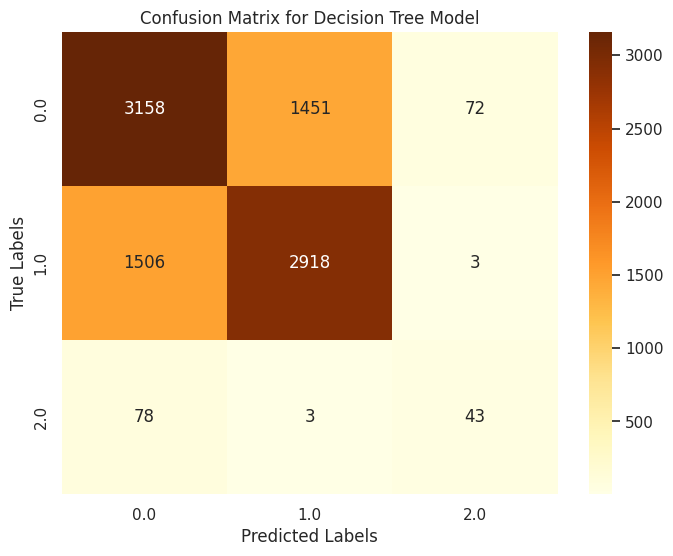

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-215-4e7a4c40d0ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


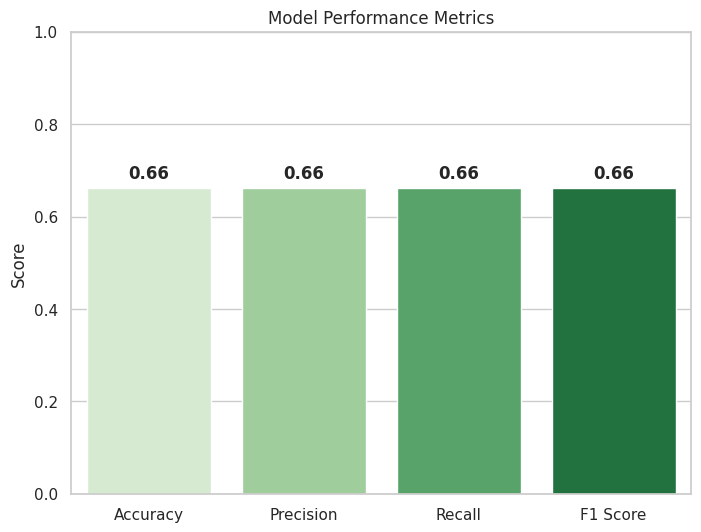

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_dt, precision_PatientStatus_p3_dt, recall_PatientStatus_p3_dt, f1_PatientStatus_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
# model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_PatientStatus_p3_svm = model.predict(X_test_PatientStatus_p3_svm)

##Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_svm = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
precision_PatientStatus_p3_svm = precision_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted', zero_division=0)
recall_PatientStatus_p3_svm = recall_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')
f1_PatientStatus_p3_svm = f1_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_svm:.4f}")
print(f"Precision: {precision_PatientStatus_p3_svm:.4f}")
print(f"Recall: {recall_PatientStatus_p3_svm:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_svm:.4f}")

Accuracy: 0.7199
Precision: 0.7331
Recall: 0.7199
F1 Score: 0.7085


##confusion matrix plot

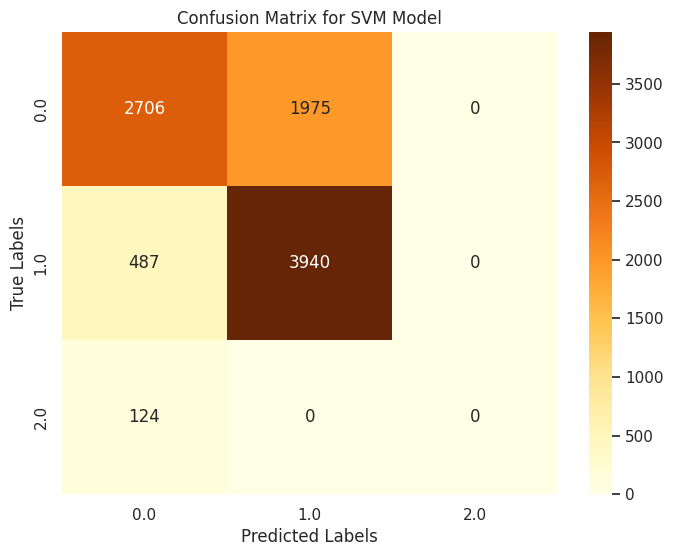

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-220-7b0122c835fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


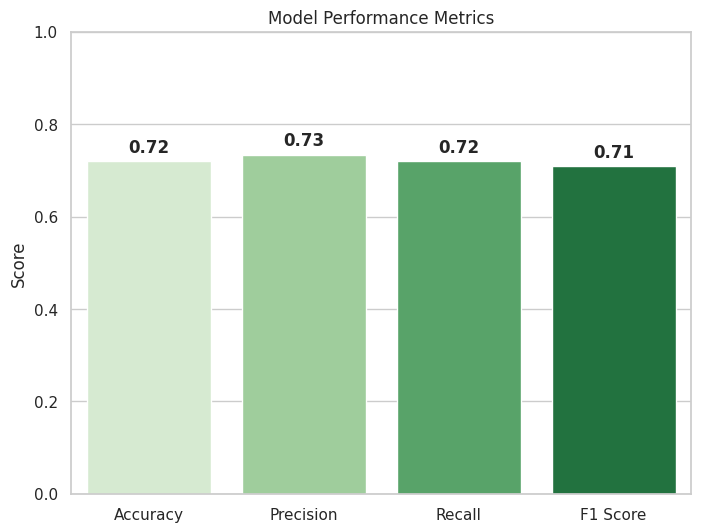

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_svm, precision_PatientStatus_p3_svm, recall_PatientStatus_p3_svm, f1_PatientStatus_p3_svm]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# Comparison table for the performance of all models

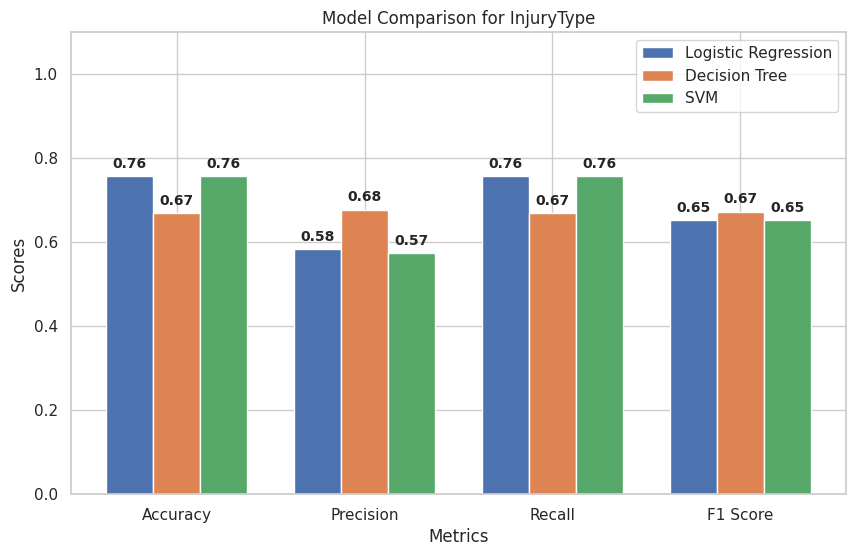

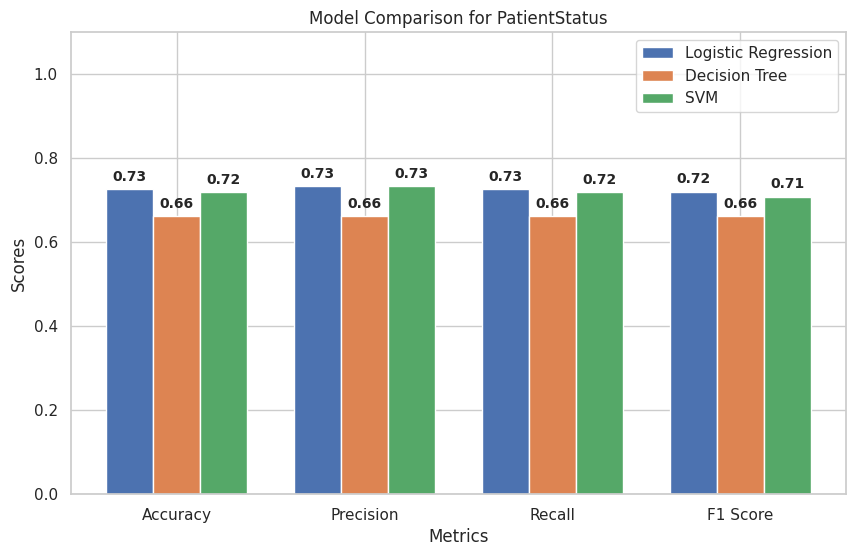

In [ ]:
# comparison table for the performance of all models
import matplotlib.pyplot as plt
import numpy as np

# Metrics data for models
models = ['Logistic Regression', 'Decision Tree', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Metrics for "InjuryType" (replace these with actual values from your experiment)
injury_metrics = {
    "Logistic Regression": [accuracy_InjuryType_p2, precision_InjuryType_p2, recall_InjuryType_p2, f1_InjuryType_p2],
    "Decision Tree": [accuracy_InjuryType_p3_dt, precision_InjuryType_p3_dt, recall_InjuryType_p3_dt, f1_InjuryType_p3_dt],
    "SVM": [accuracy_InjuryType_p3_svm, precision_InjuryType_p3_svm, recall_InjuryType_p3_svm, f1_InjuryType_p3_svm],
}

# Metrics for "PatientStatus" (replace these with actual values from your experiment)
patient_metrics = {
    "Logistic Regression": [accuracy_PatientStatus_p2, precision_PatientStatus_p2, recall_PatientStatus_p2, f1_PatientStatus_p2],
    "Decision Tree": [accuracy_PatientStatus_p3_dt, precision_PatientStatus_p3_dt, recall_PatientStatus_p3_dt, f1_PatientStatus_p3_dt],
    "SVM": [accuracy_PatientStatus_p3_svm, precision_PatientStatus_p3_svm, recall_PatientStatus_p3_svm, f1_PatientStatus_p3_svm],
}

# Plot function
def plot_comparison(metrics_data, title):
    x = np.arange(len(metrics))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, (model, scores) in enumerate(metrics_data.items()):
        ax.bar(x + i * width, scores, width, label=model)

    # Add labels, title, and legend
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for i, (model, scores) in enumerate(metrics_data.items()):
        for j, score in enumerate(scores):
            ax.text(j + i * width, score + 0.02, f"{score:.2f}", ha='center', fontsize=10, fontweight='bold')

    plt.ylim(0, 1.1)
    plt.show()

# Visualize comparison
plot_comparison(injury_metrics, 'Model Comparison for InjuryType')
plot_comparison(patient_metrics, 'Model Comparison for PatientStatus')


In [ ]:
import pandas as pd

# Data for InjuryType (example placeholder values)
data_injurytype = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [accuracy_InjuryType_p2, accuracy_InjuryType_p3_dt, accuracy_InjuryType_p3_svm],
    "Precision": [precision_InjuryType_p2, precision_InjuryType_p3_dt, precision_InjuryType_p3_svm],
    "Recall": [recall_InjuryType_p2, recall_InjuryType_p3_dt, recall_InjuryType_p3_svm],
    "F1 Score": [f1_InjuryType_p2, f1_InjuryType_p3_dt, f1_InjuryType_p3_svm],
}

# Data for PatientStatus (example placeholder values)
data_patientstatus = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [accuracy_PatientStatus_p2, accuracy_PatientStatus_p3_dt, accuracy_PatientStatus_p3_svm],
    "Precision": [precision_PatientStatus_p2, precision_PatientStatus_p3_dt, precision_PatientStatus_p3_svm],
    "Recall": [recall_PatientStatus_p2, recall_PatientStatus_p3_dt, recall_PatientStatus_p3_svm],
    "F1 Score": [f1_PatientStatus_p2, f1_PatientStatus_p3_dt, f1_PatientStatus_p3_svm],
}

# Convert data to DataFrames
df_injurytype = pd.DataFrame(data_injurytype)
df_patientstatus = pd.DataFrame(data_patientstatus)

# Beautify the tables with color and styles
def style_table(df, title):
    styled_df = (
        df.style
        .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Format numeric columns
        .set_table_styles(
            [   # Header style
                {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center")]},  # Center data
            ]
        )
        .set_properties(subset=["Model"], **{"font-weight": "bold", "color": "#2E8B57"})  # Bold Model column
        .background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Add gradient
    )
    styled_df = styled_df.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("color", "#333"), ("font-weight", "bold")]}]
    )
    return styled_df

# Display styled tables in Jupyter
display(style_table(df_injurytype, "Comparison Table for InjuryType"))
display(style_table(df_patientstatus, "Comparison Table for PatientStatus"))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7570,0.5830,0.7570,0.6530
1,Decision Tree,0.6685,0.6777,0.6685,0.6730
2,SVM,0.7575,0.5738,0.7575,0.6529


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7261,0.7328,0.7261,0.7204
1,Decision Tree,0.6628,0.6626,0.6628,0.6627
2,SVM,0.7199,0.7331,0.7199,0.7085
